# Exemplo de reamostragem das partículas

In [1]:
import numpy as np

import projeto_pf # Seu trabalho vai aqui
import inspercles
from pf import draw_random_sample

import sys
if (sys.version_info > (3, 0)):
    import importlib
    importlib.reload(projeto_pf) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    reload(projeto_pf)

%matplotlib inline



Using scikit-learn to compute nearest neighbors


## Criação das partículas e do robô

In [2]:

particulas = projeto_pf.cria_particulas()
robot = projeto_pf.robot

    
    
    
    

## Mapa com posição inicial

Este desenho é só ilustrativo, você não vai precisar chamar o código de desenho no projeto. Somente precisa criar as funções adequadas em `projeto_pf.py`.

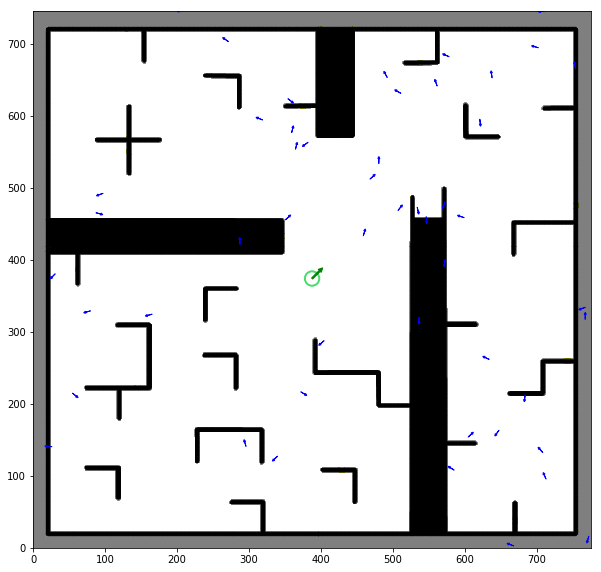

In [3]:
inspercles.nb_draw_map(inspercles.color_image, particles = particulas, pose=robot.pose(), robot=True)

Vamos tornar a distribuição de probabilidade nas partículas bem desequilibrada para observarmos a reamostragem

In [15]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [16]:
# Vamos separar a informação de posição das partículas para que possamos "ver"  as partículas
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]

particulas_pesos = [np.round(p.w, decimals=3) for p in particulas]

In [17]:
particulas_exp

[[766.8379984351225, 317.095959305629, 1.5629437295132016],
 [295.7380273676943, 140.6878433088331, 1.849975272537197],
 [458.6284124942832, 433.2972345677492, 1.2795698806453397],
 [467.87386820375343, 512.0273261031213, 0.7439991872152238],
 [287.41116857568846, 421.16406593061197, 1.6114515657212345],
 [271.35115637412065, 703.03838893308, 2.5291094456755303],
 [359.09539181773516, 576.5305504362174, 1.318200458194303],
 [620.4799157119047, 595.3489776532477, -1.4662853033441587],
 [404.27032261785, 287.7152007092241, 3.852623993216949],
 [712.433051714535, 95.42075032481026, 1.9756744432365831],
 [753.3560416046201, 665.4262194931944, 1.7242909973248928],
 [364.40244773936615, 553.5074869237976, 1.3193490016383005],
 [371.72746870474657, 216.677514605302, -0.5392927734249189],
 [79.84981632975213, 329.1002189700563, 3.415862100159182],
 [26.219976181537387, 140.5007423631141, 3.082839347853258],
 [318.87704710144635, 594.2204950170841, 2.763217996555266],
 [30.831650137443066, 380.

Vejam como está a distribuição dos pesos

In [18]:
particulas_pesos

[0.8,
 0.022,
 0.022,
 0.022,
 0.022,
 0.022,
 0.022,
 0.022,
 0.022,
 0.022,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

## Fazendo a reamostragem

Vamos criar novas partículas reamostrando usando a função `pf.draw_random_sample`

In [19]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso agora o sentido. Precisamos fazer com que todos os pesos novamente virem w=1  (ou $1/n$ como na folha de papel, tanto faz desde que todas fiquem iguais)

In [20]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

## Depois da reamostragem

Vamos observar os valores das partículas

In [21]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


**<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>**

In [22]:
valores_novas_particulas

[[766.8379984351225, 317.095959305629, 1.5629437295132016],
 [766.8379984351225, 317.095959305629, 1.5629437295132016],
 [359.09539181773516, 576.5305504362174, 1.318200458194303],
 [766.8379984351225, 317.095959305629, 1.5629437295132016],
 [766.8379984351225, 317.095959305629, 1.5629437295132016],
 [766.8379984351225, 317.095959305629, 1.5629437295132016],
 [766.8379984351225, 317.095959305629, 1.5629437295132016],
 [712.433051714535, 95.42075032481026, 1.9756744432365831],
 [766.8379984351225, 317.095959305629, 1.5629437295132016],
 [766.8379984351225, 317.095959305629, 1.5629437295132016]]

![](animated.gif)